In [4]:
import pandas as pd
import numpy as np
from scipy import stats

#Lets get the dataset
df= pd.read_csv('AB_Test_Results.csv')

print(df.head())

# --- A/B Testing Analysis --- #
# Aggregate conversion rates
conversion_summary = df.groupby('VARIANT_NAME')['REVENUE'].agg(['count', 'sum', 'mean'])
print("\nConversion Summary:\n", conversion_summary)

# Perform a t-test to compare means
control = df[df['VARIANT_NAME'] == 'control']['REVENUE']
treatment = df[df['VARIANT_NAME'] == 'variant']['REVENUE']
t_stat, p_value = stats.ttest_ind(control, treatment)

print(f"\nT-Test Results:\nT-statistic: {t_stat:.4f}, P-value: {p_value:.4f}")

# Interpretation of results
alpha = 0.05
if p_value < alpha:
    print("\nResult: The difference is statistically significant. The new version (Group B) performs better.")
else:
    print("\nResult: No statistically significant difference. The new version (Group B) does not outperform the control (Group A).")


   USER_ID VARIANT_NAME  REVENUE
0      737      variant      0.0
1     2423      control      0.0
2     9411      control      0.0
3     7311      control      0.0
4     6174      variant      0.0

Conversion Summary:
               count     sum      mean
VARIANT_NAME                         
control        4984  643.00  0.129013
variant        5016  351.47  0.070070

T-Test Results:
T-statistic: 1.2712, P-value: 0.2037

Result: No statistically significant difference. The new version (Group B) does not outperform the control (Group A).


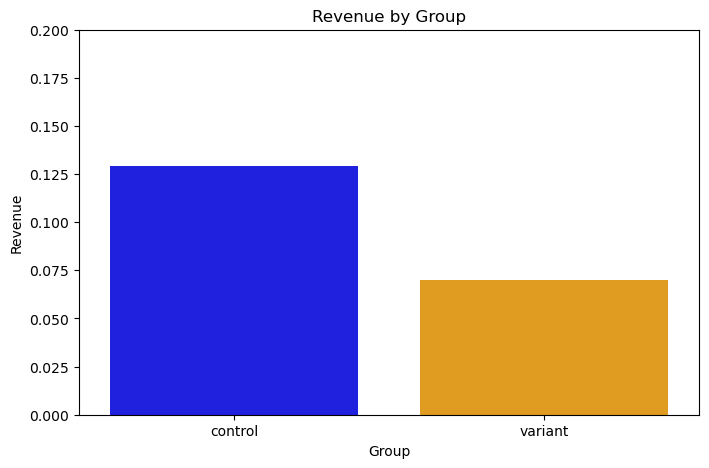

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Filter valid rows where group matches landing_page
df = df[((df['VARIANT_NAME'] == 'control') ) | 
        ((df['VARIANT_NAME'] == 'variant'))]

# Drop duplicate users
#df = df.drop_duplicates(subset='user_id')

# Aggregate conversion rates
conversion_rates = df.groupby('VARIANT_NAME')['REVENUE'].mean().reset_index()

# Plot
plt.figure(figsize=(8, 5))
sns.barplot(x='VARIANT_NAME', y='REVENUE', data=conversion_rates, palette=['blue', 'orange'])

# Labels
plt.xlabel('Group')
plt.ylabel('Revenue')
plt.title('Revenue by Group')
plt.ylim(0, 0.2)  # Adjust for clarity
plt.show()
